<a href="https://colab.research.google.com/github/WallaceSantana79/CursoMachineLearning/blob/main/Classifica%C3%A7%C3%A3o_de_Textos_com_spaCy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de textos com spaCy

## Etapa 1: Importação e instalação das bibliotecas

In [1]:
!pip install seaborn==0.10.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.9/215.9 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
import spacy
spacy.__version__

In [2]:
!python -m spacy download pt

2024-01-08 11:26:18.551680: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-08 11:26:18.551772: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-08 11:26:18.554607: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-08 11:26:18.570030: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-08 11:26:20.323667: W tensorflow/compiler/tf2

In [163]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np
import re

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Etapa 2: Carregamento da base de dados

In [6]:
base_dados = pd.read_csv('/content/base_treinamento.txt', encoding = 'utf-8')

In [7]:
base_dados.shape

(196, 2)

In [8]:
base_dados.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [9]:
base_dados.tail()

,texto,emocao
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo
195,isso me apavora,medo


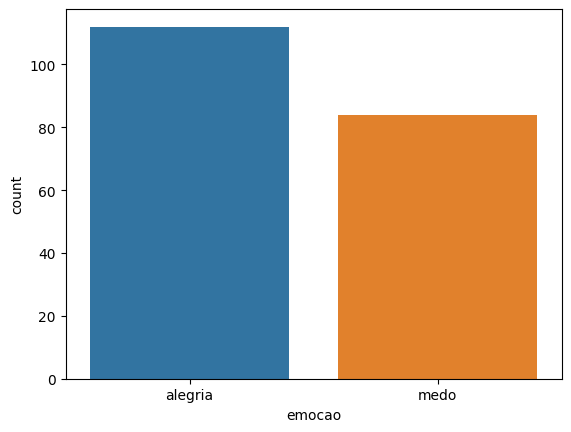

In [10]:
sns.countplot(base_dados['emocao'], label = 'Contagem');

##Etapa 3: Função para pré-processamento dos textos

In [11]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS


In [13]:
print(stop_words)

{'põe', 'faço', 'vários', 'dezoito', 'deste', 'novas', 'mal', 'lá', 'tendes', 'dentro', 'usar', 'lhe', 'tipo', 'nada', 'quieto', 'segunda', 'pois', 'sexta', 'sou', 'segundo', 'teve', 'cima', 'os', 'num', 'fazia', 'cinco', 'tanto', 'sabe', 'números', 'debaixo', 'aqueles', 'dezasseis', 'valor', 'novos', 'quatro', 'ademais', 'vossas', 'diante', 'quinta', 'certeza', 'poderá', 'mil', 'tal', 'embora', 'vos', 'estas', 'oitavo', 'vezes', 'tente', 'têm', 'obrigada', 'zero', 'vens', 'fazem', 'à', 'tempo', 'sexto', 'fazeis', 'parte', 'devem', 'doze', 'também', 'ele', 'sistema', 'posso', 'quer', 'às', 'bom', 'seu', 'querem', 'terceiro', 'está', 'quarta', 'des', 'quinze', 'comprido', 'cedo', 'na', 'aquelas', 'és', 'dessa', 'ela', 'por', 'nesta', 'quem', 'as', 'vossa', 'tarde', 'tentei', 'número', 'novo', 'cuja', 'vosso', 'sobre', 'esse', 'maiorias', 'fomos', 'estes', 'fazes', 'numa', 'quarto', 'mês', 'povo', 'tive', 'suas', 'fim', 'talvez', 'fui', 'dezassete', 'nosso', 'estar', 'porquanto', 'cada',

In [14]:
len(stop_words)

416

In [16]:
pln = spacy.load('pt_core_news_sm')

In [17]:
pln

In [61]:
def preprocessamento(texto):
  texto = texto.lower()
  documento = pln(texto)

  lista = []
  for token in documento:
    #lista.append(token.text)
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [62]:
teste = preprocessamento('Estou aprendendo processamento de linguagem natural, curso em Curitiba')
teste

'aprender processamento linguagem natural curso curitiba'

## Etapa4: Pré-processamento da base de dados

###Limpeza dos textos

In [63]:
base_dados.head(10)

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
5,adoro seu cabelo macio,alegria
6,adoro a cor dos seus olhos,alegria
7,somo tão amáveis um com o outro,alegria
8,sinto uma grande afeição por ele,alegria
9,quero agradar meus filhos,alegria


In [64]:
base_dados['texto'] = base_dados['texto'].apply(preprocessamento)

In [65]:
base_dados.head(10)

,texto,emocao
0,trabalho agradável,alegria
1,gosto ficar em o aconchego,alegria
2,fiz adesão a o curso hoje,alegria
3,admirar,alegria
4,adorar,alegria
5,adorar cabelo macio,alegria
6,adorar cor de o olho,alegria
7,somo amável outro,alegria
8,sinto afeição,alegria
9,querer agradar filho,alegria


In [66]:
base_dados.tail(10)

,texto,emocao
186,noite perigoso,medo
187,estremecer casa,medo
188,olhar criatura mover monstruosamente,medo
189,aguentar suspense,medo
190,afugente cão,medo
191,chocado amedrontar assassinato brutal,medo
192,preciso afugentar ímpeto medo de o inferno,medo
193,político força afugentar amedrontar,medo
194,objetivo de isso amedrontar,medo
195,apavorar,medo


###Tratamento da classe

In [67]:
exemplo_base_dados = [['este trabalho é agradável',{'ALEGRIA':True,'MEDO':False}],
                      ['este lugar continua assustador',{'ALEGRIA':False, 'MEDO':True}]]

In [68]:
type(exemplo_base_dados)

list

In [69]:
exemplo_base_dados[0]

['este trabalho é agradável', {'ALEGRIA': True, 'MEDO': False}]

In [70]:
exemplo_base_dados[0][0]

'este trabalho é agradável'

In [71]:
exemplo_base_dados[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [73]:
type(exemplo_base_dados[0][1])

dict

In [75]:
base_dados_final = []
for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):
  if emocao == 'alegria':
    dic = ({'ALEGRIA': True, 'MEDO':False})
  elif emocao == 'medo':
    dic = ({'ALEGRIA': False, 'MEDO':True})

  base_dados_final.append([texto,dic.copy()])

In [76]:
len(base_dados_final)

196

In [77]:
base_dados_final[0]

['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}]

In [78]:
base_dados_final[0][0]

'trabalho agradável'

In [79]:
base_dados_final[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [80]:
type(base_dados_final[0][1])

dict

In [81]:
base_dados_final

[['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gosto ficar em o aconchego', {'ALEGRIA': True, 'MEDO': False}],
 ['fiz adesão a o curso hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelo macio', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cor de o olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somo amável outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amo', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixoneir', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir animar', {'ALEGRIA': True, 'MEDO': False}],
 ['sintar hoje', {'ALEGRIA': Tr

## Etapa 5: Criação do classificador

In [86]:
from spacy.training import Example

In [83]:
modelo = spacy.blank('pt')
textcat = modelo.add_pipe("textcat")
textcat.add_label("ALEGRIA")
textcat.add_label("MEDO")
historico = []

In [87]:
modelo.begin_training()
for epoca in range(1000):
  random.shuffle(base_dados_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_final, 30):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    examples = [Example.from_dict(doc, annotation) for doc, annotation in zip(
            textos, annotations
        )]
    modelo.update(examples, losses=losses)
  if epoca % 100 == 0:
    print(losses)
    historico.append(losses)

{'textcat': 1.739656150341034}
{'textcat': 3.1850316438084e-11}
{'textcat': 4.304132706712052e-12}
{'textcat': 1.0692863153076437e-12}
{'textcat': 3.693750576808314e-13}
{'textcat': 1.56081732045519e-13}
{'textcat': 7.119030452624022e-14}
{'textcat': 3.7485649545019955e-14}
{'textcat': 1.7989782095093922e-14}
{'textcat': 9.78067186601175e-15}


In [89]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [90]:
historico_loss = np.array(historico_loss)
historico_loss

array([1.73965615e+00, 3.18503164e-11, 4.30413271e-12, 1.06928632e-12,
       3.69375058e-13, 1.56081732e-13, 7.11903045e-14, 3.74856495e-14,
       1.79897821e-14, 9.78067187e-15])

Text(0, 0.5, 'Erro')

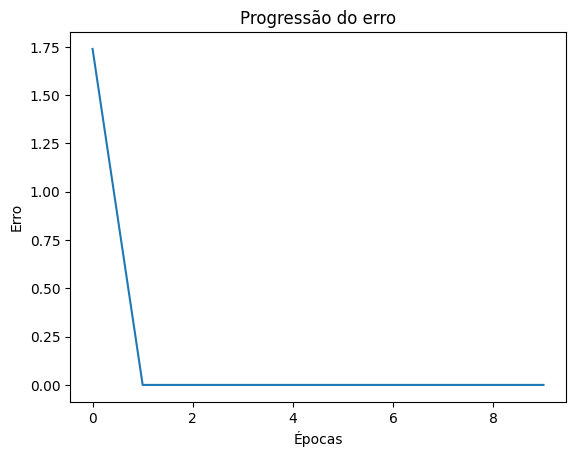

In [93]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')

In [94]:
modelo.to_disk('modelo')

## Etapa6: Testes com uma frase

In [95]:
modelo_carregado = spacy.load('modelo')
modelo_carregado

In [100]:
texto_positivo = 'eu adoro a cor dos seus olhos'

In [101]:
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'adorar cor de o olho'

In [102]:
previsao = modelo_carregado(texto_positivo)
previsao

adorar cor de o olho

In [103]:
previsao.cats

{'ALEGRIA': 1.0, 'MEDO': 1.302497842914363e-08}

In [107]:
texto_negativo = 'estou com medo dele'
previsao = modelo_carregado(preprocessamento(texto_negativo))
previsao.cats

{'ALEGRIA': 3.354229249907803e-08, 'MEDO': 1.0}

## Etapa 7: Avaliação do modelo

### Avaliação na base de treinamento

In [110]:
previsoes = []
for texto in base_dados['texto']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [111]:
previsoes

[{'ALEGRIA': 1.0, 'MEDO': 1.784192527054529e-08},
 {'ALEGRIA': 0.9999998807907104, 'MEDO': 7.898290022012588e-08},
 {'ALEGRIA': 1.0, 'MEDO': 9.474020679078876e-09},
 {'ALEGRIA': 1.0, 'MEDO': 2.619206362908244e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.383798298171257e-09},
 {'ALEGRIA': 1.0, 'MEDO': 6.119501794188409e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.302497842914363e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.051811526764368e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.279454491826982e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.4386215774209177e-08},
 {'ALEGRIA': 1.0, 'MEDO': 6.238900951416326e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.3722238456637115e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.0045327620010767e-09},
 {'ALEGRIA': 1.0, 'MEDO': 7.015200420568135e-09},
 {'ALEGRIA': 1.0, 'MEDO': 5.182592133223807e-08},
 {'ALEGRIA': 1.0, 'MEDO': 7.999380713386017e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.202293020696743e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.2239513342015016e-08},
 {'ALEGRIA': 1.0, 'MEDO': 8.698711084775823e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.025

In [113]:
previsoes_final =[]
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [114]:
previsoes_final

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [115]:
respostas_reais = base_dados['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [116]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

1.0

In [117]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[112,   0],
       [  0,  84]])

### Avaliação na base de teste

In [118]:
base_dados_teste = pd.read_csv('/content/base_teste.txt', encoding = 'utf-8')

In [119]:
base_dados_teste.head()

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria


In [120]:
base_dados_teste['texto'] = base_dados_teste['texto'].apply(preprocessamento)

In [121]:
base_dados_teste.head()

,texto,emocao
0,precisar pagar ingresso,alegria
1,ajeitar ficar,alegria
2,fortuna ultrapassar,alegria
3,afortunar,alegria
4,benéfico medida,alegria


In [122]:
previsoes = []
for texto in base_dados_teste['texto']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [123]:
previsoes_final =[]
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [124]:
respostas_reais = base_dados_teste['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo'], dtype=object)

In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

0.5833333333333334

In [126]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[29, 19],
       [16, 20]])

##Classificação de textos do Twitter com spaCy

### Carregamento das bases de dados

*Link Kaggle: https://www.kaggle.com/augustop/portuguese-tweets-for-sentiment-analysis#TweetsNeutralHash.csv

###Base de treinamento

In [127]:
base_treinamento = pd.read_csv('/content/Train50.csv', delimiter=';')

In [128]:
base_treinamento.shape

(50000, 5)

In [129]:
base_treinamento.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)


In [131]:
base_treinamento.tail()

,id,tweet_text,tweet_date,sentiment,query_used
49995,1046762827053232128,:( é tão lindo que dói https://t.co/GqnpgyWWxB,Mon Oct 01 14:04:40 +0000 2018,0,:(
49996,1046762813362966529,"@veraluciarj Pois é.. tenho problema c/ ""coisa...",Mon Oct 01 14:04:37 +0000 2018,0,:(
49997,1046762806392082432,eu te amo tanto minja vidinha meu bem mais pre...,Mon Oct 01 14:04:35 +0000 2018,0,:(
49998,1046762752071618560,@itsLary @jessboluda Pfvor :(,Mon Oct 01 14:04:22 +0000 2018,0,:(
49999,1046762735340584962,@Renk_lol Passa ano Entra ano Eu nao desisto d...,Mon Oct 01 14:04:18 +0000 2018,0,:(


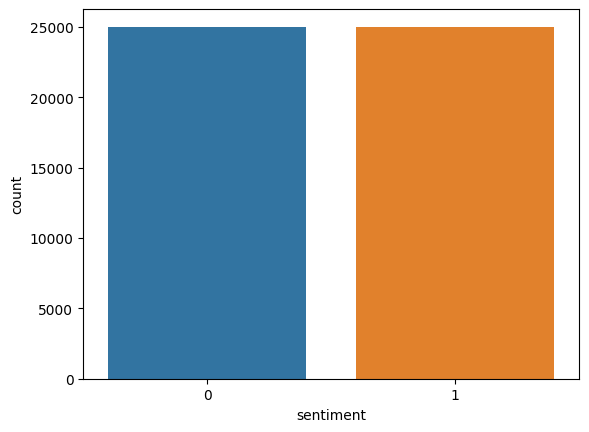

In [132]:
sns.countplot(base_treinamento['sentiment'],label='Contagem');

In [133]:
base_treinamento.drop(['id','tweet_date', 'query_used'], axis=1,inplace=True)

In [134]:
base_treinamento.head()

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1


In [135]:
base_treinamento.tail()

,tweet_text,sentiment
49995,:( é tão lindo que dói https://t.co/GqnpgyWWxB,0
49996,"@veraluciarj Pois é.. tenho problema c/ ""coisa...",0
49997,eu te amo tanto minja vidinha meu bem mais pre...,0
49998,@itsLary @jessboluda Pfvor :(,0
49999,@Renk_lol Passa ano Entra ano Eu nao desisto d...,0


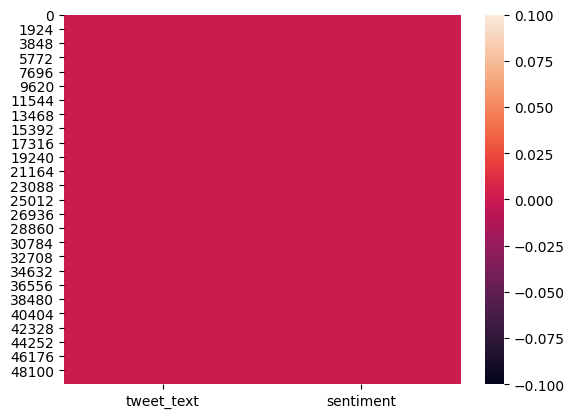

In [137]:
sns.heatmap(pd.isnull(base_treinamento));

###Base de teste

In [138]:
base_teste = pd.read_csv('/content/Test.csv', delimiter=';')

In [139]:
base_teste.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1029536486021099522,@Gazo1a Nossa! Muito obrigada :),Wed Aug 15 01:13:20 +0000 2018,1,:)
1,1029536496368406528,@BerzGamer vai pa puta que te pariu :),Wed Aug 15 01:13:23 +0000 2018,1,:)
2,1029536531655131137,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,Wed Aug 15 01:13:31 +0000 2018,1,:)
3,1029536560117678081,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",Wed Aug 15 01:13:38 +0000 2018,1,:)
4,1029536605852377088,Estávamos em casa do Zé e eu estava a morrer d...,Wed Aug 15 01:13:49 +0000 2018,1,:)


In [140]:
base_teste.tail()

,id,tweet_text,tweet_date,sentiment,query_used
4995,1030528364145201153,@ol_cdanilo parece livro de autoajuda :(,Fri Aug 17 18:54:42 +0000 2018,0,:(
4996,1030528418235015168,@tatazoquita aaaaa sinto muito :((,Fri Aug 17 18:54:55 +0000 2018,0,:(
4997,1030528446122930176,To começando a sentir dor de novo e meu irmão ...,Fri Aug 17 18:55:02 +0000 2018,0,:(
4998,1030528453752352769,@ichbintw parece que no dia que toma a vacina ...,Fri Aug 17 18:55:04 +0000 2018,0,:(
4999,1030528465521586177,@nessagomesc @laymuniz23 poxaa acho q essa q v...,Fri Aug 17 18:55:07 +0000 2018,0,:(


In [152]:
base_teste.shape

(5000, 5)

In [153]:
base_teste.drop(['id','tweet_date', 'query_used'],axis=1,inplace=True)

In [154]:
base_teste.head()

,tweet_text,sentiment
0,@Gazo1a Nossa! Muito obrigada :),1
1,@BerzGamer vai pa puta que te pariu :),1
2,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,1
3,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",1
4,Estávamos em casa do Zé e eu estava a morrer d...,1


In [155]:
base_teste.tail()

,tweet_text,sentiment
4995,@ol_cdanilo parece livro de autoajuda :(,0
4996,@tatazoquita aaaaa sinto muito :((,0
4997,To começando a sentir dor de novo e meu irmão ...,0
4998,@ichbintw parece que no dia que toma a vacina ...,0
4999,@nessagomesc @laymuniz23 poxaa acho q essa q v...,0


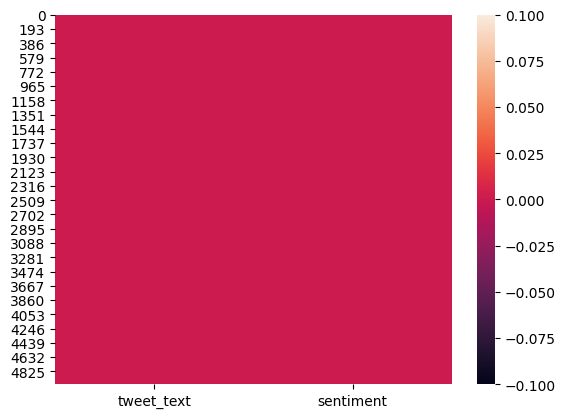

In [156]:
sns.heatmap(pd.isnull(base_teste));

###Função para pré-processamento dos textos

In [158]:
pln= spacy.load('pt_core_news_sm')
pln

In [159]:
stop_words = spacy.lang.pt.stop_words.STOP_WORDS

In [164]:
def preprocessamento(texto):
  # Letras minúsculas
  texto = texto.lower()

  # Nome do usuário
  texto = re.sub(r"@[A-Za-z0-9$-_@.&+]+", ' ', texto)

  # URLs
  texto = re.sub(r"https?://[A-Za-z0-9./]+", ' ', texto)

  # Espaços em branco
  texto = re.sub(r" +", ' ', texto)

  # Emoticons
  lista_emocoes = {':)': 'emocaopositiva',
                   ':d': 'emocaopositiva',
                   ':(': 'emocaonegativa'}
  for emocao in lista_emocoes:
    texto = texto.replace(emocao, lista_emocoes[emocao])

  # Lematização
  documento = pln(texto)

  lista = []
  for token in documento:
    lista.append(token.lemma_)

  # Stop words e pontuações
  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in string.punctuation]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

###Pré-Processamento dos dados

####Limpeza dos textos

In [165]:
base_treinamento.head(10)

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1
5,@KingJokerLeto mas amiga eu to aqui ainda :),1
6,"@RivasJairo Bravo, Jairo!!! :)))",1
7,@inquilinasls @Spotify socorro ksoaksosks acho...,1
8,"@chimekarlla gosto muito de fazenda :) , mas m...",1
9,Amanha vou ver venom :D,1


In [166]:
base_treinamento['tweet_text'] = base_treinamento['tweet_text'].apply(preprocessamento)

In [167]:
base_treinamento.head(10)

,tweet_text,sentiment
0,pessoa certo vale azevedo emocaopositivo,1
1,precisamente contrário emocaopositiva vir ch...,1
2,video hoje ... pensar falar meta de o csgo pag...,1
3,Aaaaaaaa amei polaroids expressar to apaixonar...,1
4,valorizar coração de o menininho vc diferente ...,1
5,amiga to emocaopositivo,1
6,bravo jairo emocaopositivo,1
7,socorro ksoaksosks achar to em o caixinha so...,1
8,gostar fazenda emocaopositivo morro medo gal...,1
9,amanha venom emocaopositivo,1


In [168]:
base_teste['tweet_text'] = base_teste['tweet_text'].apply(preprocessamento)

In [169]:
base_teste.head(10)

,tweet_text,sentiment
0,emocaopositivo,1
1,pa puta parir emocaopositiva,1
2,querer desconto 14/08 ⭐ ⭐ ⭐ ⭐ ⭐ 🌐 confiro em o...,1
3,vcs ajudar galera por o amor butera emocaoposi...,1
4,casa de o zé morrer sono chegar casa fico sono...,1
5,precisar emocaopositivo,1
6,acaso adorar beijo abraço hahahahaha bue fof...,1
7,solteiro s sozinho emocaopositivo,1
8,lindeza cortador kit Mário coleção ber Cravol ...,1
9,claro emocaopositivo,1


####Tratamento da classe

In [170]:
exemplo_base_dados = [['estra trabalho é agradável',{'POSITIVO':True,'NEGATIVO':False}],
                      ['este lugar continua assustador',{'POSITIVO':False, 'NEGATIVO':True}]]

In [171]:
base_dados_treinamento_final = []
for texto, ecomocao in zip(base_treinamento['tweet_text'], base_treinamento['sentiment']):
  if emocao==1:
    dic = ({'POSITIVO':True, 'NEGATIVO':False})
  elif emocao ==0:
    dic = ({'POSITIVO':False, 'NEGATIVO':True})

  base_dados_treinamento_final.append([texto,dic.copy()])

In [172]:
len(base_dados_treinamento_final)

50000

In [173]:
base_dados_treinamento_final[10:15]

[['simplesmente deixar chatear querer muitooo iludir emocaopositivo',
  {'ALEGRIA': False, 'MEDO': True}],
 ['começar rotina perfeitamente consolidar escola condução :p',
  {'ALEGRIA': False, 'MEDO': True}],
 ['amigo parecer apaixonado vc — recíproco emocaopositivo',
  {'ALEGRIA': False, 'MEDO': True}],
 ['  gajo bacano aleija esperar Silva feliz emocaopositivo',
  {'ALEGRIA': False, 'MEDO': True}],
 ['tar video cabrinha bebé emocaopositivo', {'ALEGRIA': False, 'MEDO': True}]]

In [176]:
base_dados_treinamento_final[45000:45005]

[['menino de o pijama listrar filme triste de o mundo estrutura nenhum pra assistir rever to pensar em isso emocaonegativo',
  {'ALEGRIA': False, 'MEDO': True}],
 ['pra vídeo de o Luísa Raiz poliana infelizmente twitter tá ruim amanhã postar emocaonegativo asaventurasdepoliana099',
  {'ALEGRIA': False, 'MEDO': True}],
 ['to crise abstinência stranger emocaonegativo — tbm :/ to',
  {'ALEGRIA': False, 'MEDO': True}],
 ['  esquecer olhar pra pagar mensalidade turma pro curso querer emocaonegativo',
  {'ALEGRIA': False, 'MEDO': True}],
 ['querer comer doce comi monte hoje emocaonegativo maldição',
  {'ALEGRIA': False, 'MEDO': True}]]

###Criação do classificador

In [178]:
modelo = spacy.blank('pt')
textcat = modelo.add_pipe("textcat")
textcat.add_label("POSITIVO")
textcat.add_label("NEGATIVO")
historico = []

In [180]:
modelo.begin_training()
for epoca in range(5):
  random.shuffle(base_dados_treinamento_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_treinamento_final, 512):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    examples = [Example.from_dict(doc, annotation) for doc, annotation in zip(
        textos, annotations
      )]
    modelo.update(examples, losses=losses)
    historico.append(losses)
  if epoca % 5 == 0:
    print(losses)

{'textcat': 24.5}


In [182]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [183]:
historico_loss = np.array(historico_loss)
historico_loss

array([24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5,
       24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5,
       24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5,
       24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5,
       24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5,
       24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5,
       24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5,
       24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5,
       24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5,
       24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5,
       24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5,
       24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5,
       24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5,
       24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24

Text(0, 0.5, 'Erro')

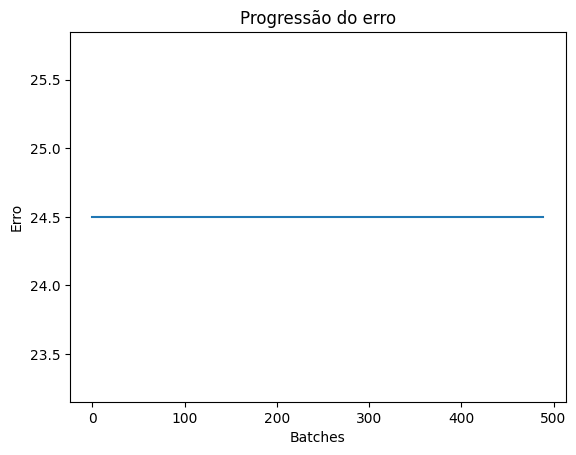

In [185]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Batches')
plt.ylabel('Erro')

In [186]:
modelo.to_disk('modelo')

###Testes com uma frase

In [187]:
modelo_carregado = spacy.load('modelo')
modelo_carregado

###Texto positivo

In [188]:
texto_positivo = base_teste['tweet_text'][21]
texto_positivo

'  fico feliz q recíproco emocaopositivo'

In [189]:
previsao = modelo_carregado(texto_positivo)
previsao

  fico feliz q recíproco emocaopositivo

In [190]:
previsao.cats

{'POSITIVO': 0.5, 'NEGATIVO': 0.5}